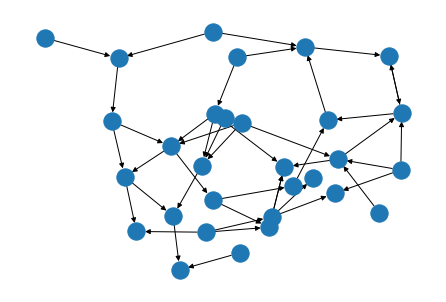

In [2]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

def pagerank(g, alpha = 0.85, n=100):
    node = random.choice(list(g.nodes))
    movement = []
    for i in range(n):
        if random.uniform(0,1) < alpha:
            neighbors = list(g.neighbors(node))
            if not neighbors:
                node = random.choice(list(g.nodes))
            else:
                node = random.choice(neighbors)
        else:
            node = random.choice(list(g.nodes))
        movement.append(node)
    
    total = Counter(movement)
    
    for i in total.keys():
        total[i] /= len(movement)
    return total

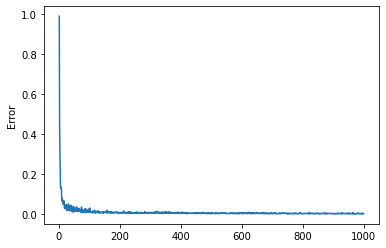

In [8]:
results = []
trials = np.arange(1,1001)

for i in trials:
    model = pagerank(g, n=i)
    library = nx.pagerank(g)
    total_error = 0
    
    for j in model:
        total_error += abs(model[j] - library[j])
    results.append(total_error/len(model))
    
plt.plot(trials, results)
plt.ylabel("Error")
plt.show()